In [1]:
# import the necessary packages

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns


# DBSCAN algorithm
We perform the density-based clustering using DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm.
It has only two parameters...

- eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
- min_samples: the minimum number of points needed to create a cluster.
... and one output:
- cluster labels for each point in the dataset. Noisy samples are given the label -1.

## Pre-processing
We will use the normalized dataset with Min-Max approach to perform DBSCAN.

<Axes: >

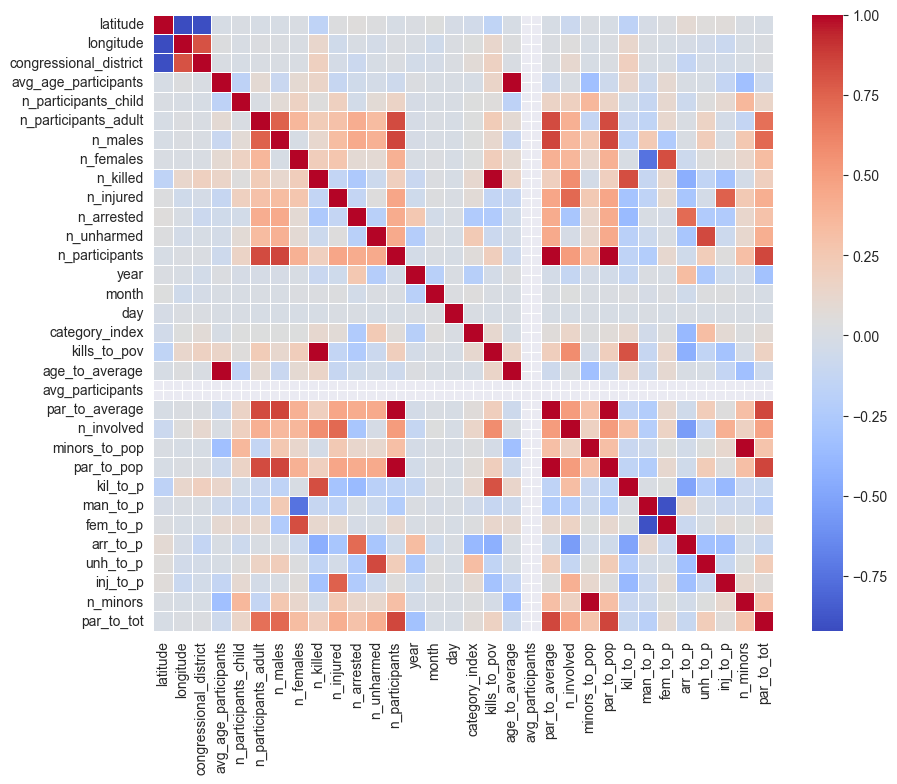

In [2]:
df = pd.read_csv('../data/extracted_features.csv')

standard = StandardScaler()
minmax = MinMaxScaler()

#pick the California data
df = df[df['state'] == 'California']
df = df.dropna(subset=['n_participants', 'n_involved', 'age_to_average', 'par_to_tot'])

# plot correlation matrix to see if there is any feature to drop
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 10})

In [3]:
df[['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9397 entries, 12356 to 86262
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n_participants  9397 non-null   int64  
 1   n_involved      9397 non-null   int64  
 2   age_to_average  9397 non-null   float64
 3   par_to_tot      9397 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 367.1 KB


In [4]:

new_df = df[['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']]

# remove highly correlated features

# scale the data
ss_scaled = standard.fit_transform(new_df)
mm_scaled = minmax.fit_transform(new_df)

In [5]:
from scipy.spatial.distance import pdist, squareform
import tqdm


def calc_k_nn_dist_graph(X, ub=0., lb=0.):
    # List of k (for k-th nearest neighbour)
    k_list = [3, 5, 10, 15]

    dist = pdist(X, 'euclidean')  # Pairwise distance
    dist = squareform(dist)  # Distance matrix given the vector dist

    # Calculate sorted list of distances for points for each k
    for k in k_list:
        kth_distances = []
        for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])

        # Plot the graph of distance from k-th nearest neighbour
        plt.figure(figsize=(8, 6))
        plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
        plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
        plt.xlabel('sorted distances', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
        plt.axhline(ub)
        plt.axhline(lb)
        plt.show()


def db_scan_function(X, eps_list, minpts_list):
    # Table with dim = len(eps_list) x len(minpts_list)
    clustering_results = []

    # Total number of combinations
    total_combinations = len(eps_list) * len(minpts_list)
    current_combination = 0

    # Iterate over eps (rows)
    for eps in eps_list:
        minpts_results = []

        # Iterate over minpts
        for minpts in minpts_list:
            dbscan = DBSCAN(eps=eps, min_samples=minpts, n_jobs=-1)
            dbscan.fit(X)  # Fit the DBSCAN model to the data
            minpts_results.append(dbscan)  # Store the DBSCAN model

            # Update progress
            current_combination += 1
            print(f"Progress: {current_combination}/{total_combinations}")

        clustering_results.append(minpts_results)

    return clustering_results


def print_dbscan(dbscan_table, eps_values, min_samples, dataframe):
    data = []
    columns = ['eps\\minpts'] + [str(minpt) for minpt in min_samples]

    for i, eps in enumerate(eps_values):
        row_data = [str(eps)]
        for j, minpts in enumerate(min_samples):
            dbscan = dbscan_table[i][j]

            try:  # Exception in case of num_clusters=1
                silhouette = round(silhouette_score(dataframe, dbscan.labels_), 2)
            except:
                silhouette = np.nan
            cell_str = str(silhouette) + '-n_clust:' + str(len(np.unique(dbscan.labels_)) - 1)
            row_data.append(cell_str)

        data.append(row_data)

    return pd.DataFrame(data, columns=columns)


In [6]:
# values of min_samples to try
min_samples = range(3, 20, 2)

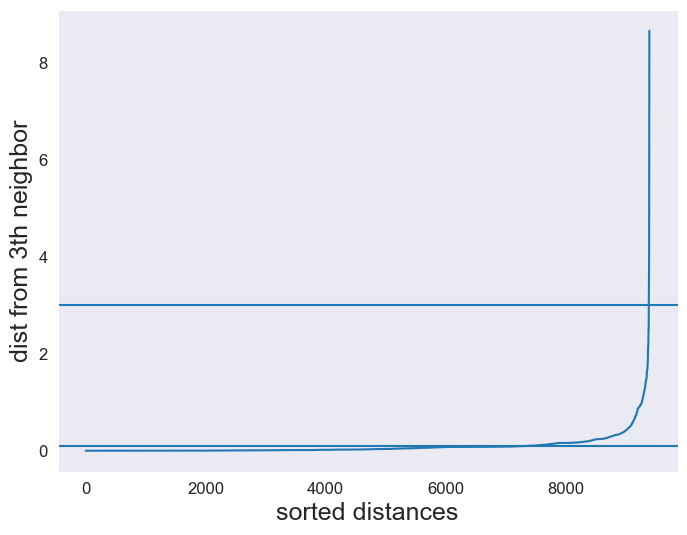

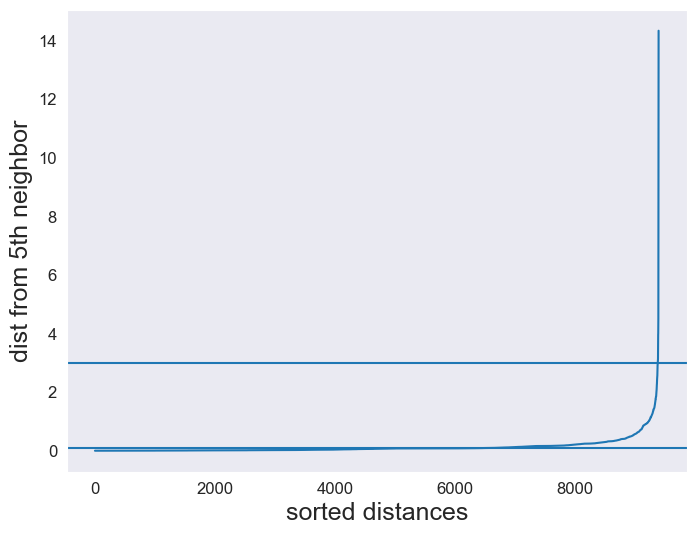

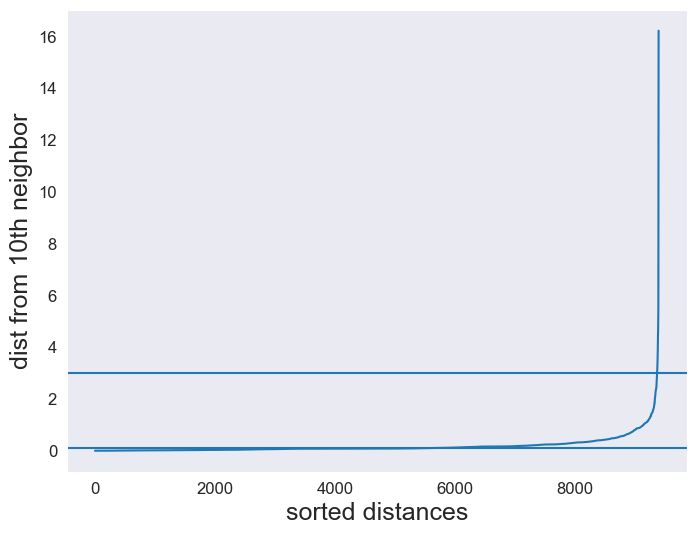

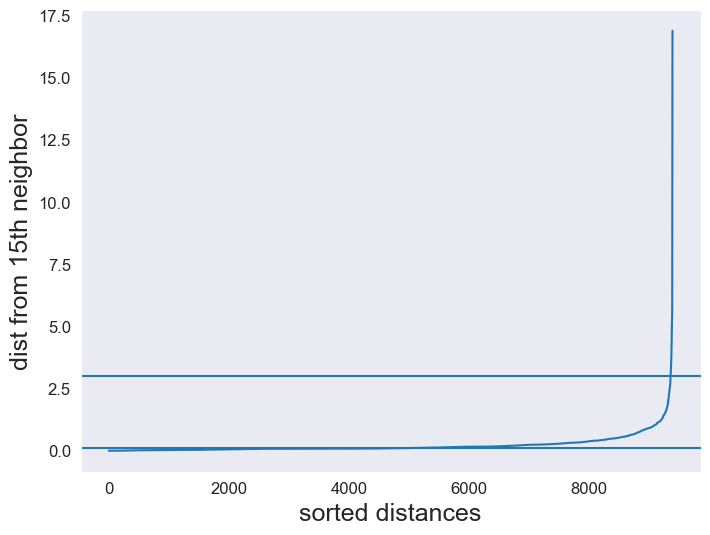

In [16]:

# values of eps to try
ss_eps_values = np.linspace(0.1, 3, 20)

#repeat the same for standard scaled data
calc_k_nn_dist_graph(ss_scaled, 0.1, 3)

In [8]:

dbscan_table = db_scan_function(ss_scaled, ss_eps_values, min_samples)
scalar_result = print_dbscan(dbscan_table, ss_eps_values, min_samples, ss_scaled)

Progress: 1/180
Progress: 2/180
Progress: 3/180
Progress: 4/180
Progress: 5/180
Progress: 6/180
Progress: 7/180
Progress: 8/180
Progress: 9/180
Progress: 10/180
Progress: 11/180
Progress: 12/180
Progress: 13/180
Progress: 14/180
Progress: 15/180
Progress: 16/180
Progress: 17/180
Progress: 18/180
Progress: 19/180
Progress: 20/180
Progress: 21/180
Progress: 22/180
Progress: 23/180
Progress: 24/180
Progress: 25/180
Progress: 26/180
Progress: 27/180
Progress: 28/180
Progress: 29/180
Progress: 30/180
Progress: 31/180
Progress: 32/180
Progress: 33/180
Progress: 34/180
Progress: 35/180
Progress: 36/180
Progress: 37/180
Progress: 38/180
Progress: 39/180
Progress: 40/180
Progress: 41/180
Progress: 42/180
Progress: 43/180
Progress: 44/180
Progress: 45/180
Progress: 46/180
Progress: 47/180
Progress: 48/180
Progress: 49/180
Progress: 50/180
Progress: 51/180
Progress: 52/180
Progress: 53/180
Progress: 54/180
Progress: 55/180
Progress: 56/180
Progress: 57/180
Progress: 58/180
Progress: 59/180
Progre

In [9]:
scalar_result

,eps\minpts,3,5,7,9,11,13,15,17,19
0,0.1,-0.14-n_clust:245,-0.24-n_clust:105,-0.26-n_clust:62,-0.23-n_clust:40,-0.18-n_clust:28,-0.21-n_clust:24,-0.24-n_clust:22,-0.23-n_clust:25,-0.3-n_clust:20
1,0.25263157894736843,0.12-n_clust:80,0.12-n_clust:48,0.13-n_clust:34,0.14-n_clust:24,0.13-n_clust:19,0.14-n_clust:13,0.13-n_clust:14,0.11-n_clust:13,0.07-n_clust:11
2,0.4052631578947369,0.18-n_clust:42,0.19-n_clust:29,0.2-n_clust:20,0.19-n_clust:19,0.2-n_clust:18,0.19-n_clust:16,0.2-n_clust:15,0.19-n_clust:15,0.18-n_clust:15
3,0.5578947368421052,0.22-n_clust:32,0.22-n_clust:23,0.22-n_clust:21,0.22-n_clust:18,0.22-n_clust:18,0.21-n_clust:18,0.21-n_clust:17,0.21-n_clust:14,0.2-n_clust:14
4,0.7105263157894737,0.22-n_clust:32,0.22-n_clust:23,0.22-n_clust:20,0.23-n_clust:19,0.23-n_clust:17,0.22-n_clust:18,0.22-n_clust:17,0.22-n_clust:16,0.22-n_clust:16
5,0.8631578947368421,0.17-n_clust:18,0.17-n_clust:8,0.18-n_clust:6,0.18-n_clust:6,0.18-n_clust:7,0.18-n_clust:6,0.18-n_clust:6,0.18-n_clust:5,0.18-n_clust:5
6,1.0157894736842106,0.18-n_clust:12,0.19-n_clust:6,0.19-n_clust:5,0.19-n_clust:5,0.19-n_clust:5,0.19-n_clust:5,0.19-n_clust:5,0.19-n_clust:5,0.19-n_clust:5
7,1.168421052631579,0.62-n_clust:9,0.74-n_clust:1,0.61-n_clust:2,0.72-n_clust:1,0.72-n_clust:1,0.71-n_clust:1,0.71-n_clust:1,0.7-n_clust:1,0.7-n_clust:1
8,1.3210526315789475,0.7-n_clust:4,0.65-n_clust:3,0.75-n_clust:1,0.74-n_clust:1,0.73-n_clust:1,0.73-n_clust:1,0.73-n_clust:1,0.73-n_clust:1,0.72-n_clust:1
9,1.473684210526316,0.77-n_clust:3,0.78-n_clust:1,0.76-n_clust:1,0.76-n_clust:1,0.75-n_clust:1,0.75-n_clust:1,0.75-n_clust:1,0.75-n_clust:1,0.75-n_clust:1


In [7]:
# values of eps to try
mm_eps_values = np.linspace(0.03, 0.1, 10)

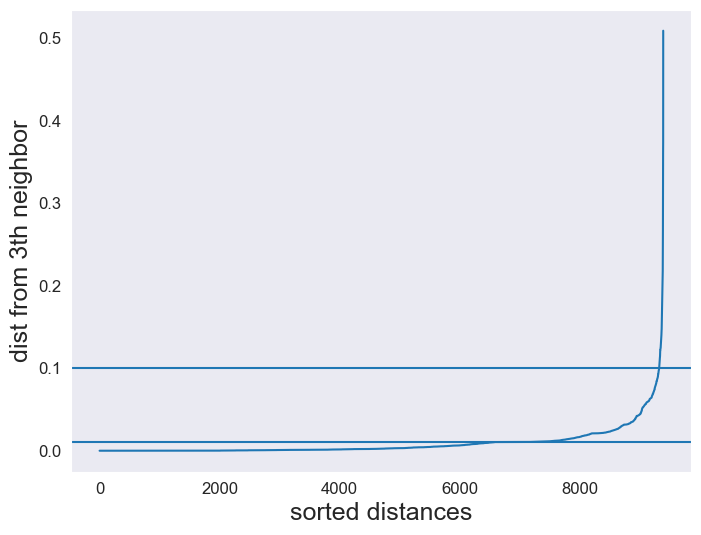

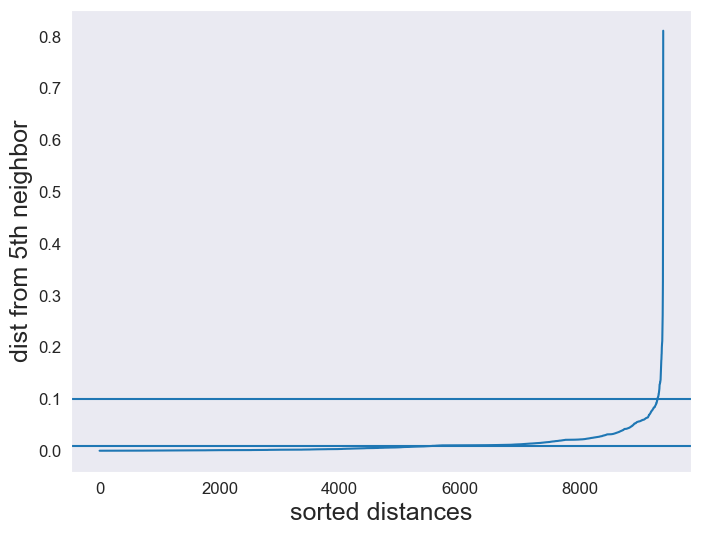

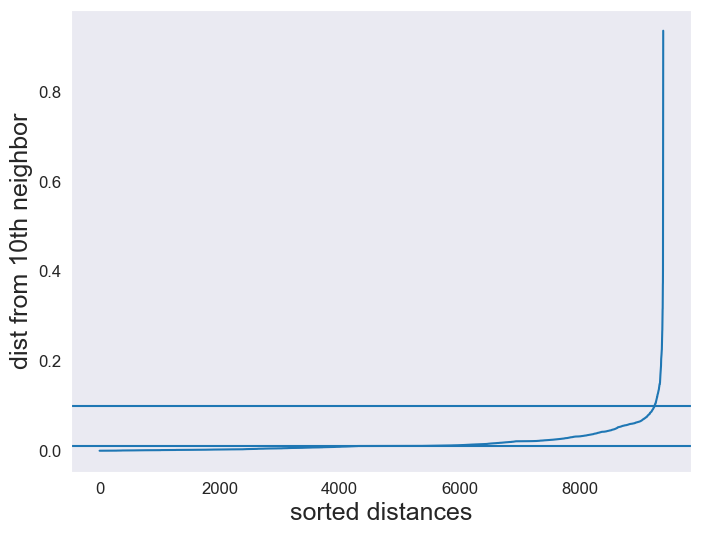

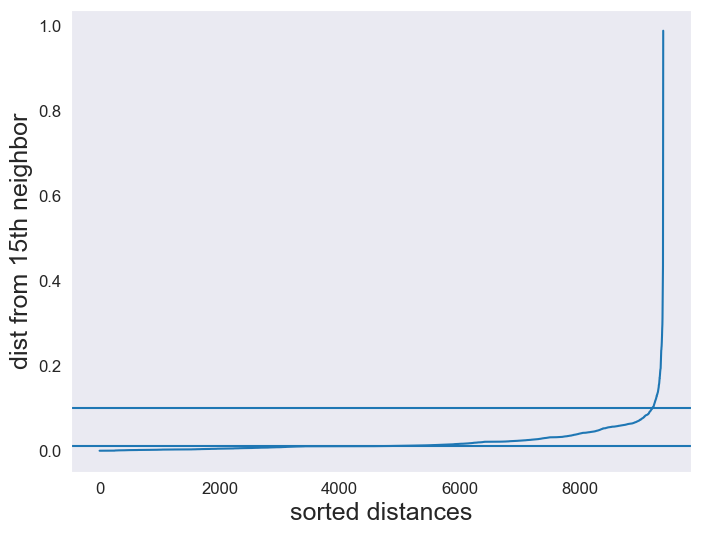

In [8]:
calc_k_nn_dist_graph(mm_scaled, 0.01, 0.1)

In [9]:
dbscan_table = db_scan_function(mm_scaled, mm_eps_values, min_samples)
minmax_result = print_dbscan(dbscan_table, mm_eps_values, min_samples, mm_scaled)

Progress: 1/90
Progress: 2/90
Progress: 3/90
Progress: 4/90
Progress: 5/90
Progress: 6/90
Progress: 7/90
Progress: 8/90
Progress: 9/90
Progress: 10/90
Progress: 11/90
Progress: 12/90
Progress: 13/90
Progress: 14/90
Progress: 15/90
Progress: 16/90
Progress: 17/90
Progress: 18/90
Progress: 19/90
Progress: 20/90
Progress: 21/90
Progress: 22/90
Progress: 23/90
Progress: 24/90
Progress: 25/90
Progress: 26/90
Progress: 27/90
Progress: 28/90
Progress: 29/90
Progress: 30/90
Progress: 31/90
Progress: 32/90
Progress: 33/90
Progress: 34/90
Progress: 35/90
Progress: 36/90
Progress: 37/90
Progress: 38/90
Progress: 39/90
Progress: 40/90
Progress: 41/90
Progress: 42/90
Progress: 43/90
Progress: 44/90
Progress: 45/90
Progress: 46/90
Progress: 47/90
Progress: 48/90
Progress: 49/90
Progress: 50/90
Progress: 51/90
Progress: 52/90
Progress: 53/90
Progress: 54/90
Progress: 55/90
Progress: 56/90
Progress: 57/90
Progress: 58/90
Progress: 59/90
Progress: 60/90
Progress: 61/90
Progress: 62/90
Progress: 63/90
P

In [10]:
minmax_result

,eps\minpts,3,5,7,9,11,13,15,17,19
0,0.03,-0.09-n_clust:72,-0.08-n_clust:42,-0.08-n_clust:32,-0.08-n_clust:24,-0.08-n_clust:18,-0.11-n_clust:20,-0.08-n_clust:13,-0.1-n_clust:14,-0.08-n_clust:12
1,0.03777777777777778,-0.05-n_clust:49,-0.04-n_clust:34,-0.02-n_clust:24,-0.04-n_clust:23,-0.02-n_clust:18,-0.04-n_clust:18,-0.05-n_clust:15,-0.06-n_clust:16,-0.06-n_clust:11
2,0.04555555555555556,-0.04-n_clust:42,-0.02-n_clust:30,0.01-n_clust:19,0.02-n_clust:18,0.01-n_clust:18,0.01-n_clust:14,0.02-n_clust:13,0.02-n_clust:12,0.01-n_clust:14
3,0.05333333333333333,-0.02-n_clust:34,-0.01-n_clust:26,0.02-n_clust:19,0.03-n_clust:17,0.03-n_clust:18,0.01-n_clust:18,0.01-n_clust:15,0.02-n_clust:13,0.03-n_clust:12
4,0.061111111111111116,0.32-n_clust:10,0.43-n_clust:2,0.43-n_clust:3,0.43-n_clust:2,0.22-n_clust:3,0.56-n_clust:1,0.55-n_clust:1,0.51-n_clust:2,0.51-n_clust:2
5,0.06888888888888889,0.24-n_clust:8,0.38-n_clust:3,0.62-n_clust:1,0.61-n_clust:1,0.6-n_clust:1,0.6-n_clust:1,0.59-n_clust:1,0.58-n_clust:1,0.58-n_clust:1
6,0.07666666666666666,0.51-n_clust:6,0.49-n_clust:2,0.64-n_clust:1,0.63-n_clust:1,0.63-n_clust:1,0.62-n_clust:1,0.62-n_clust:1,0.61-n_clust:1,0.61-n_clust:1
7,0.08444444444444445,0.57-n_clust:2,0.67-n_clust:2,0.67-n_clust:1,0.65-n_clust:1,0.65-n_clust:1,0.64-n_clust:1,0.64-n_clust:1,0.63-n_clust:1,0.63-n_clust:1
8,0.09222222222222223,0.71-n_clust:2,0.68-n_clust:2,0.7-n_clust:1,0.68-n_clust:1,0.67-n_clust:1,0.66-n_clust:1,0.66-n_clust:1,0.66-n_clust:1,0.65-n_clust:1
9,0.1,0.71-n_clust:2,0.68-n_clust:2,0.71-n_clust:1,0.7-n_clust:1,0.69-n_clust:1,0.69-n_clust:1,0.67-n_clust:1,0.67-n_clust:1,0.67-n_clust:1


In [19]:
def print_best_params(silhouette_scores, parameter_combinations):
    best_score_index = np.argmax(silhouette_scores)  # Get the index of the maximum silhouette score
    best_params = parameter_combinations[best_score_index]  # Retrieve parameters corresponding to the best score

    best_eps, best_min_samples, n_clusters = best_params  # Unpack the best parameters

    best_score = silhouette_scores[best_score_index]  # Get the best silhouette score

    # Print the best silhouette score and corresponding parameters
    print(f"Best Silhouette Score: {best_score}")
    print(f"Best Parameters - eps: {best_eps}, min_samples: {best_min_samples}", f"Number of clusters: {n_clusters}")
    return best_eps, best_min_samples

# MinMax Scaling Test

In [12]:
# test the best parameters for the DBSCAN algorithm
silhouette_scores = []
parameter_combinations = []

best_score = -1  # Initialize best silhouette score
best_params = {'eps': None, 'min_samples': None}
for eps in mm_eps_values:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(mm_scaled)

        unique_labels = np.unique(labels)
        if len(unique_labels) < 4 or len(unique_labels) > 50: continue
        silhouette = silhouette_score(mm_scaled, labels)
        print(
            f"Number of clusters: {len(unique_labels)}, eps: {eps}, min_samples: {min_sample} , Silhouette score: {silhouette}")
        silhouette_scores.append(silhouette)
        parameter_combinations.append((eps, min_sample))

# Plotting the results
silhouette_scores = np.array(silhouette_scores)
parameter_combinations = np.array(parameter_combinations)


Number of clusters: 43, eps: 0.03, min_samples: 5 , Silhouette score: -0.07868642559855957
Number of clusters: 33, eps: 0.03, min_samples: 7 , Silhouette score: -0.08319771937116657
Number of clusters: 25, eps: 0.03, min_samples: 9 , Silhouette score: -0.0752373776220974
Number of clusters: 19, eps: 0.03, min_samples: 11 , Silhouette score: -0.0844138442683085
Number of clusters: 21, eps: 0.03, min_samples: 13 , Silhouette score: -0.1106876092629522
Number of clusters: 14, eps: 0.03, min_samples: 15 , Silhouette score: -0.07552667271307655
Number of clusters: 15, eps: 0.03, min_samples: 17 , Silhouette score: -0.09539888167699406
Number of clusters: 13, eps: 0.03, min_samples: 19 , Silhouette score: -0.07750399201625567
Number of clusters: 50, eps: 0.03777777777777778, min_samples: 3 , Silhouette score: -0.04652070063040235
Number of clusters: 35, eps: 0.03777777777777778, min_samples: 5 , Silhouette score: -0.04336625805138388
Number of clusters: 25, eps: 0.03777777777777778, min_samp

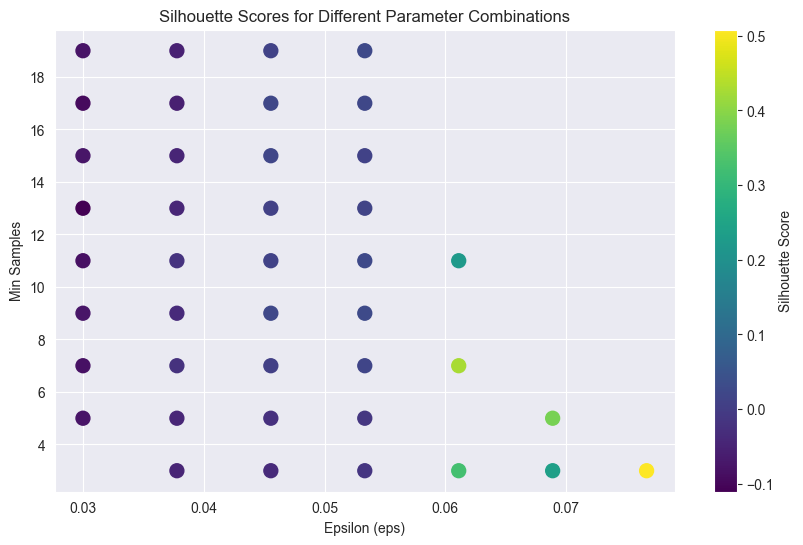

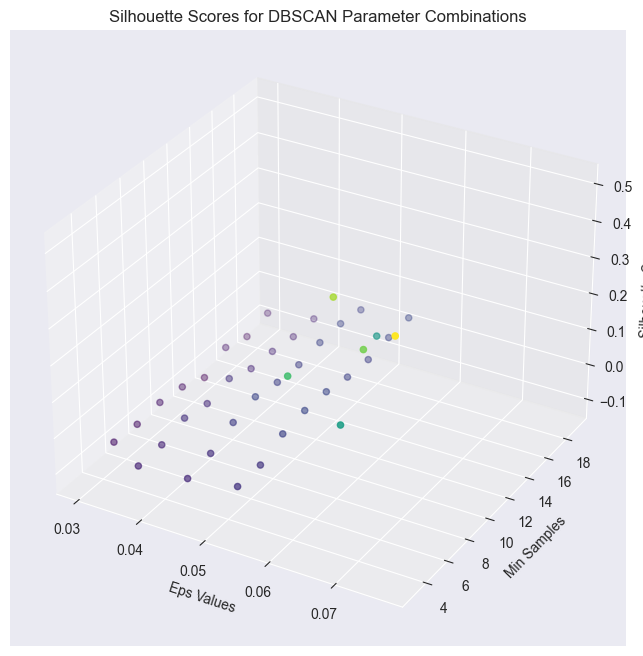

Best Silhouette Score: 0.5082005800005384
Best Parameters - eps: 0.07666666666666666, min_samples: 3.0


In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(parameter_combinations[:, 0], parameter_combinations[:, 1], c=silhouette_scores, cmap='viridis', s=100)
plt.colorbar(label='Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Min Samples')
plt.title('Silhouette Scores for Different Parameter Combinations')
plt.grid(True)
plt.show()

eps_values = parameter_combinations[:, 0]
min_samples_values = parameter_combinations[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(eps_values, min_samples_values, silhouette_scores, c=silhouette_scores, cmap='viridis')
ax.set_xlabel('Eps Values')
ax.set_ylabel('Min Samples')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Scores for DBSCAN Parameter Combinations')

plt.show()

best_eps, best_min_samples = print_best_params(silhouette_scores, parameter_combinations)

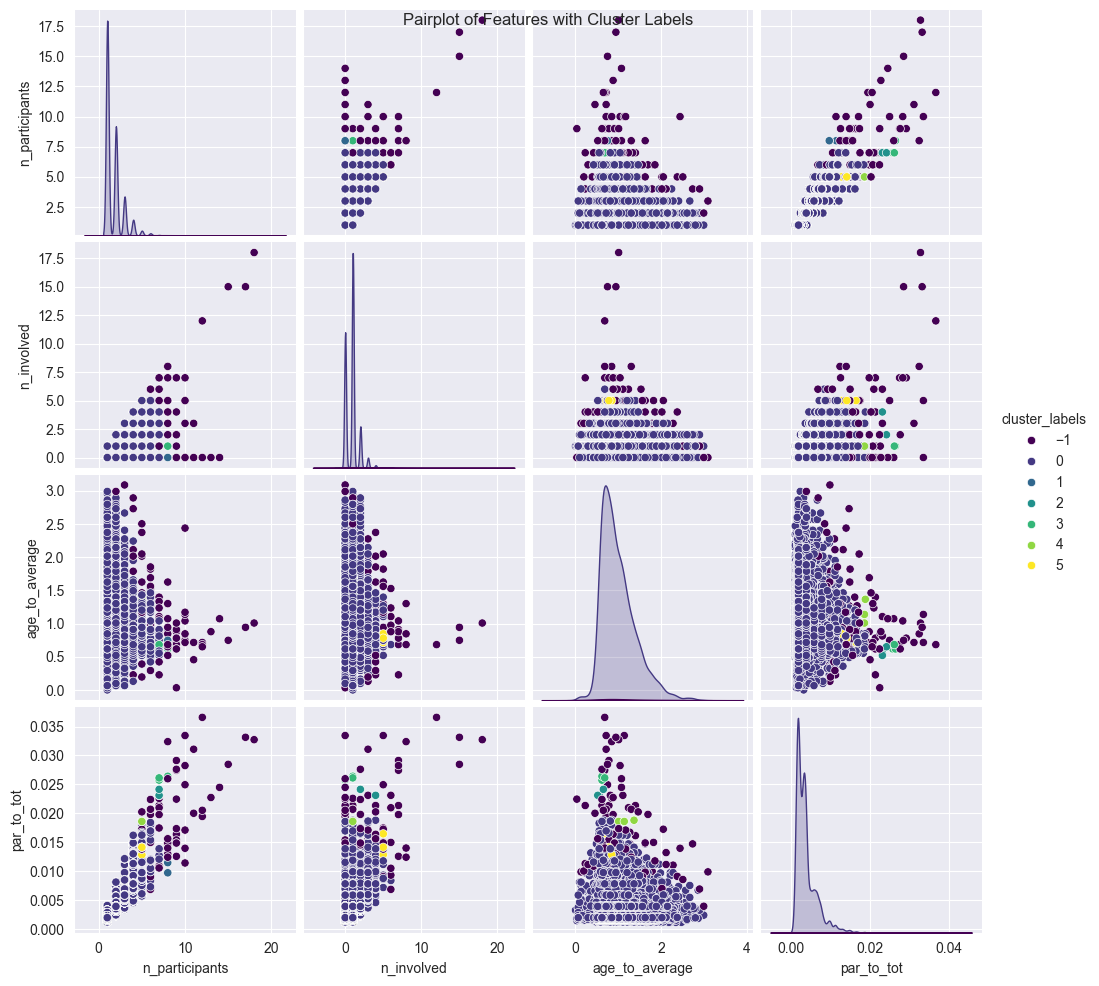

cluster_labels
 0    9294
-1      88
 1       3
 3       3
 2       3
 4       3
 5       3
Name: count, dtype: int64

In [14]:
dbscan = DBSCAN(eps=best_eps, min_samples=int(best_min_samples))
cluster_labels = dbscan.fit_predict(mm_scaled)
selected_data = new_df.copy()
selected_data['cluster_labels'] = cluster_labels
sns.pairplot(selected_data, hue='cluster_labels', palette='viridis')
plt.suptitle('Pairplot of Features with Cluster Labels')
plt.show()
selected_data['cluster_labels'].value_counts()


# Standard Scaling Test

In [17]:
silhouette_scores = []
parameter_combinations = []

best_score = -1  # Initialize best silhouette score
best_params = {'eps': None, 'min_samples': None}

for eps in ss_eps_values:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(ss_scaled)

        unique_labels = np.unique(labels)
        if len(unique_labels) < 4 or len(unique_labels) > 50: continue
        silhouette = silhouette_score(ss_scaled, labels)
        print(
            f"Number of clusters: {len(unique_labels)}, eps: {eps}, min_samples: {min_sample} , Silhouette score: {silhouette}")
        silhouette_scores.append(silhouette)
        parameter_combinations.append((eps, min_sample, len(unique_labels)))

# Plotting the results
silhouette_scores = np.array(silhouette_scores)
parameter_combinations = np.array(parameter_combinations)


Number of clusters: 41, eps: 0.1, min_samples: 9 , Silhouette score: -0.2345886163554732
Number of clusters: 29, eps: 0.1, min_samples: 11 , Silhouette score: -0.1840091763858847
Number of clusters: 25, eps: 0.1, min_samples: 13 , Silhouette score: -0.21370928425179572
Number of clusters: 23, eps: 0.1, min_samples: 15 , Silhouette score: -0.2353574115577867
Number of clusters: 26, eps: 0.1, min_samples: 17 , Silhouette score: -0.22845464753491726
Number of clusters: 21, eps: 0.1, min_samples: 19 , Silhouette score: -0.3007126912870108
Number of clusters: 49, eps: 0.25263157894736843, min_samples: 5 , Silhouette score: 0.1221840750290485
Number of clusters: 35, eps: 0.25263157894736843, min_samples: 7 , Silhouette score: 0.13019896706420267
Number of clusters: 25, eps: 0.25263157894736843, min_samples: 9 , Silhouette score: 0.13828221212138764
Number of clusters: 20, eps: 0.25263157894736843, min_samples: 11 , Silhouette score: 0.13409313246635043
Number of clusters: 14, eps: 0.25263157

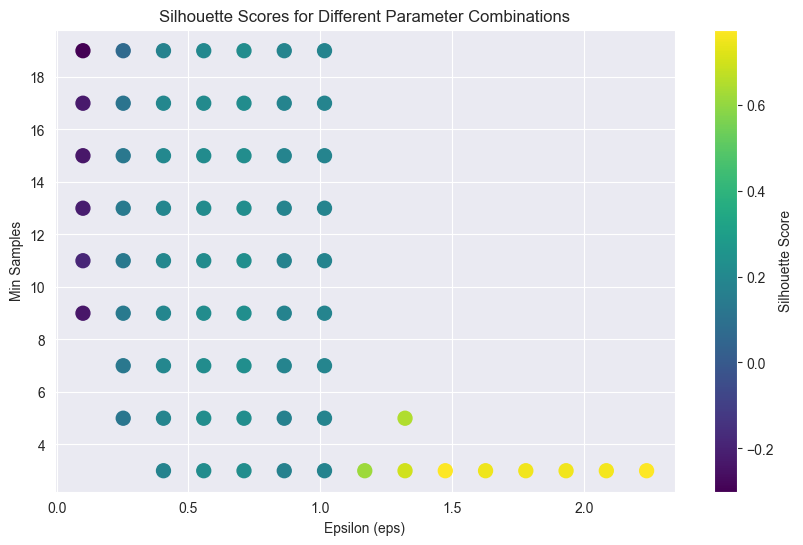

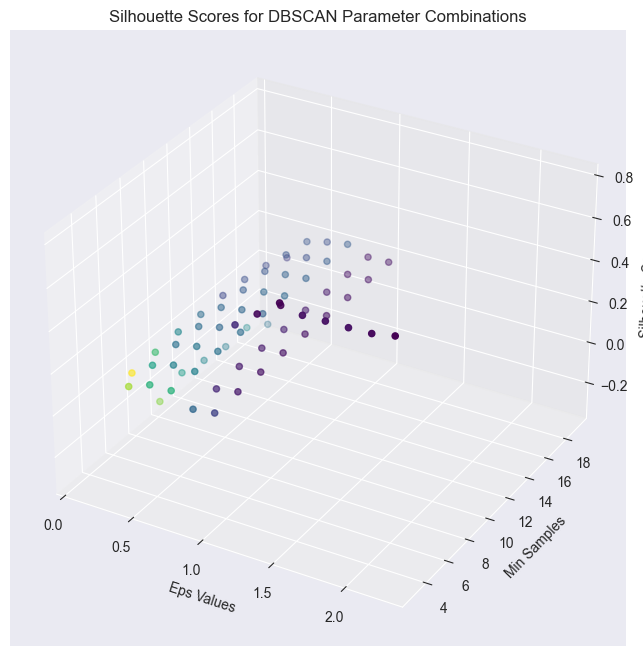

ValueError: too many values to unpack (expected 2)

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(parameter_combinations[:, 0], parameter_combinations[:, 1], c=silhouette_scores, cmap='viridis', s=100)
plt.colorbar(label='Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Min Samples')
plt.title('Silhouette Scores for Different Parameter Combinations')
plt.grid(True)
plt.show()

eps_values = parameter_combinations[:, 0]
min_samples_values = parameter_combinations[:, 1]
clusters = parameter_combinations[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(eps_values, min_samples_values, silhouette_scores, c=clusters, cmap='viridis')
ax.set_xlabel('Eps Values')
ax.set_ylabel('Min Samples')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Scores for DBSCAN Parameter Combinations')

plt.show()

best_eps, best_min_samples = print_best_params(silhouette_scores, parameter_combinations)

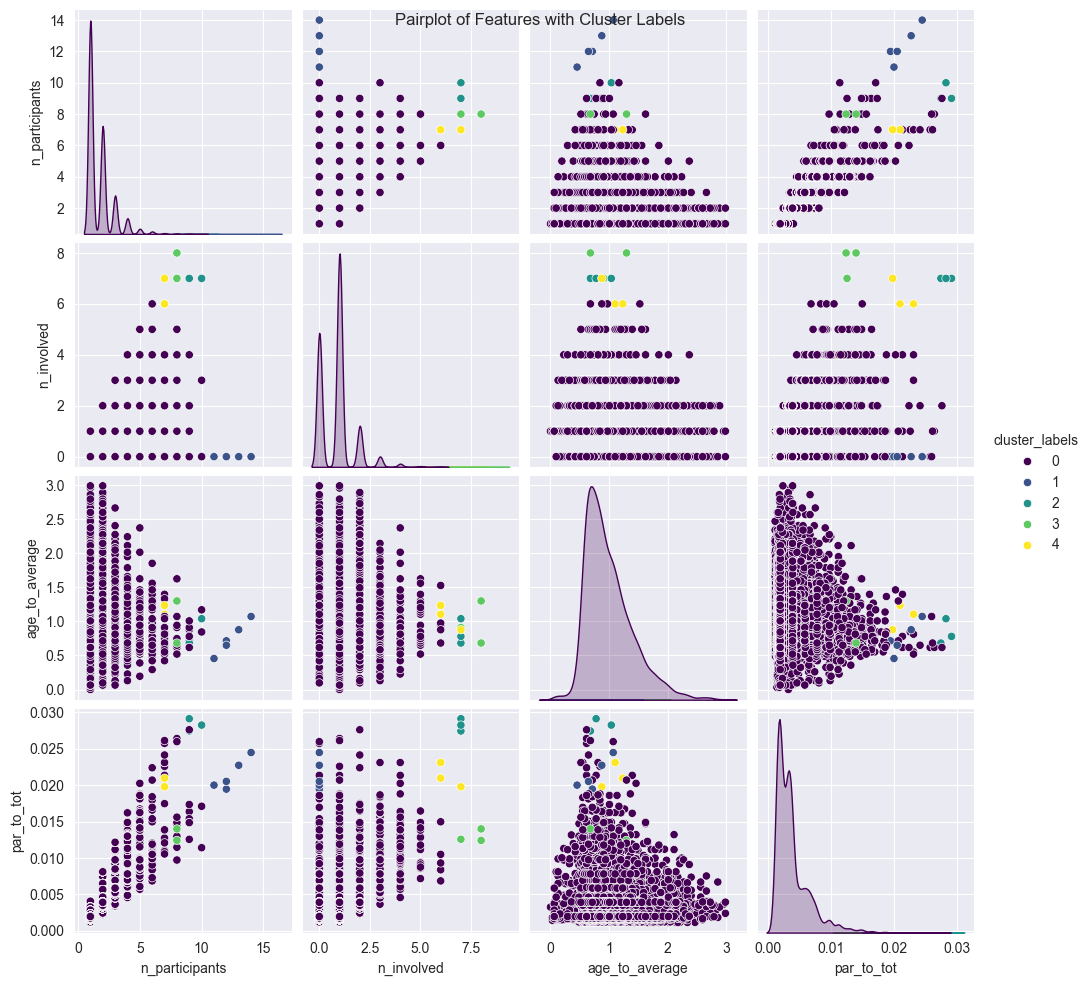

cluster_labels
0    9362
1       5
2       3
3       3
4       3
Name: count, dtype: int64

In [20]:
if True:
    dbscan = DBSCAN(eps=1.5, min_samples=3)
    cluster_labels = dbscan.fit_predict(ss_scaled)
    selected_data = new_df.copy()
    selected_data['cluster_labels'] = cluster_labels
    selected_data = selected_data[selected_data['cluster_labels'] != -1]
    sns.pairplot(selected_data, hue='cluster_labels', palette='viridis')
    plt.suptitle('Pairplot of Features with Cluster Labels')
    plt.show()

#count size of each cluster
selected_data['cluster_labels'].value_counts()

In [ ]:
import plotly.express as px

#remove data with -1 label
selected_data.head()
if False:
    fig = px.scatter_mapbox(
        pd.merge(selected_data, df, how="right"), lat='latitude', lon='longitude',
        color='cluster_labels', mapbox_style="carto-positron",
        zoom=3, width=1000, height=600
    )
    fig.show()